In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from osgeo import gdal

In [5]:
s1_hv = np.random.rand(256,256)
s1_vv = np.random.rand(256,256)

BANDS = ["B02", "B03", "B04", "B05"]

s2_cloudy = {band: np.random.rand(256,256) for band in BANDS}
s2_cloudfree = {band: np.random.rand(256,256) for band in BANDS}

In [6]:
result = np.stack((s1_hv, s1_vv, *s2_cloudy.values()), axis=-1)

In [81]:
def create_sample_image():
    return np.random.rand(256, 256)

num_images_block1 = 5
images_block1 = [create_sample_image() for _ in range(num_images_block1)]
images_block2 = [create_sample_image() for _ in range(3)]
# Set the desired figsize (width, height) in inches
width, height = 16, 8

# Calculate the number of rows based on the number of images
num_images = len(images_block1)
num_rows = (num_images + 3) // 4

# Create the first figure with the specified figsize
fig1, axes1 = plt.subplots(num_rows, 4, figsize=(width, height))

# Display the images with titles
for i in range(num_rows):
    for j in range(4):
        idx = i * 4 + j
        if idx < num_images:
            ax = axes1[i, j] if num_rows > 1 else axes1[j]
            ax.imshow(images_block1[idx], cmap="gray")
            ax.set_title(f"Image {idx+1}")  # Add title above the image
            ax.axis("off")
        else:
            (axes1[i, j] if num_rows > 1 else axes1[j]).axis("off")

# Adjust the layout and save the first plot
plt.tight_layout()
plt.savefig('plot1.png')
plt.close(fig1)  # Close the figure to free up memory



# Create the second figure with the specified figsize
fig2, axes2 = plt.subplots(1, 3, figsize=(width, height))

# Display the last row with 3 images centered and with titles
axes2[0].imshow(images_block2[0])
axes2[0].set_title(f"Image {j + 12}")  # Add title above the image
axes2[0].axis("off")

axes2[1].imshow(images_block2[1])
axes2[1].set_title(f"Image {j + 12}")  # Add title above the image
axes2[1].axis("off")

axes2[2].imshow(images_block2[2])
axes2[2].set_title(f"Image {j + 12}")  # Add title above the image
axes2[2].axis("off")

# Adjust the layout and save the second plot
plt.tight_layout()
plt.savefig('plot2.png')
plt.close(fig2)

2


In [26]:
im = gdal.Open("/Volumes/X/Data/fusion-s1-s2/s1db/32VNH/threeband/139/S1_32VNH_20200404_D_139.tif").ReadAsArray()

In [27]:
im.shape

(3, 10980, 10980)

In [28]:
im = im.transpose((1, 2, 0))

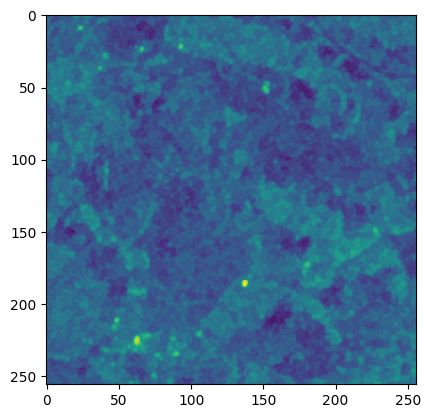

In [31]:
plt.imshow(im[5000:5256,5000:5256,1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


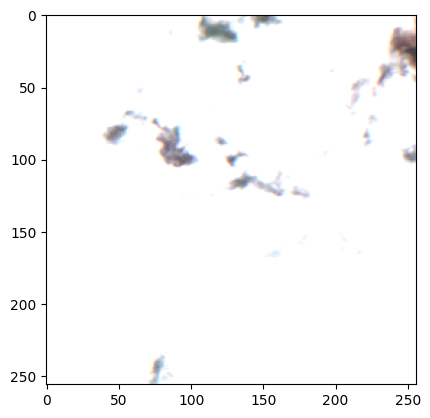

In [7]:
path = "S2_32VNH_20210404_B02_17_543500_6297440_256"
d = gdal.Open("data/cropped/s2/S2_32VNH_20210404/S2_32VNH_20210404_B02/S2_32VNH_20210404_B02_17_543500_6297440_256.vrt").ReadAsArray()
t = gdal.Open("data/cropped/s2/S2_32VNH_20210404/S2_32VNH_20210404_B03/S2_32VNH_20210404_B03_17_543500_6297440_256.vrt").ReadAsArray()
q = gdal.Open("data/cropped/s2/S2_32VNH_20210404/S2_32VNH_20210404_B04/S2_32VNH_20210404_B04_17_543500_6297440_256.vrt").ReadAsArray()
plt.imshow(np.stack((q,t,d), axis=-1)/2000)